# Pymaceuticals Inc.
---

### Analysis

During this analsyis we had three main phases of work:  including data cleaning, data exploration, and data visualization. Some of the key insights and findings from the analysis involve: Information on the tumor response to various drug regimens, as well as the survival rate of mice treated with those regimens.  A set of drug regieme treatment's effectiveness were analyized over time. Monitoring mice, regieme, age, weight, and size of tumors.  

The key findings are as followed and described in both data frames/sets as well as visualizations.  

Tumor volume decreased over time for mice treated with Capomulin and Ramicane (positve correlation to treatment), while it increased for mice treated with Infubinol and Ceftamin (negative correlation to treatment).
To further investigate the tumor volume for each treatment, a box plot was created (see box plot figure below in analysis) for each treatment regimen. The results of the box plots show:

Final Tumor Volume is the measure of size of tumor at the last time period in the study:

Tumor Volume detail for four Treatment focus set: 
-For Capomulin, the median final tumor volume was 38.13 mm3, with a lower quartile of 32.38 mm3 and an upper quartile of 40.16 mm3. The interquartile range (IQR) was 7.78 mm3. 

-For Ramicane, the median final tumor volume was 36.56 mm3, with a lower quartile of 30.98 mm3 and an upper quartile of 38.51 mm3. The interquartile range (IQR) was 7.53 mm3. 

-For Infubinol, the median final tumor volume was 64.43 mm3, with a lower quartile of 62.75 mm3 and an upper quartile of 67.69 mm3. The interquartile range (IQR) was 4.93 mm3. 

-For Ceftamin, the median final tumor volume was 64.30 mm3, with a lower quartile of 61.43 mm3 and an upper quartile of 67.53 mm3. The interquartile range (IQR) was 6.09 mm3.

Treatments Capomulin and Ramicane appear to be more effective in reducing tumor volume in mice than the other drugs included in the analysis: Mice in this study adminstreed Capomulin and Ramicane had higher survival rates than mice treated with the other drug regimens.

The data supported a strong positive correlation between mouse weight and tumor volume for mice treated with Capomulin.  The distribution of tumor volume was varied across the different drug regimens, with some regimens having higher median tumor volumes and more outliers than others.

We used linear regression model to further explore this relationship. (see linear regerssion figure in analysis below.  The regression line was calculated to be:  Tumor Volume (mm3) = 0.95 * Weight (g) + 21.55

The correlation coefficient between mouse weight and average tumor volume was found to be 0.84, indicating a   strong positive correlation between the two variables.  Results were even stronger when mice treated specifically treated with the Capomulin regimen.

In addition to investigating the relationship between mouse weight and average tumor volume in mice treated with the Capomulin regimen, the gender distribution of the mice was also examined.

The data shows that the study included 958 male mice and 922 female mice. This balanced distribution suggests that any observed effects of mouse weight on tumor volume are not likely to be confounded by gender.

However, further investigation could be done to examine potential gender differences in the response to the Capomulin regimen, as well as the interaction between gender and weight in predicting tumor volume.











In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
#counts = mouse_meta['mouseid'].value_counts()
mouse_id_counts = study_results['Mouse ID'].value_counts()
len(mouse_id_counts)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup = merged_data.loc[merged_data["Mouse ID"]== "g989"]
mouse_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data_df = merged_data[merged_data["Mouse ID"]!= "g989"]
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_id_counts2 = clean_data_df['Mouse ID'].value_counts()
len(mouse_id_counts2)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_stats_df = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_stats_df = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_stats_df = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_stats_df = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_stats_df = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sum_df = mean_stats_df,median_stats_df ,variance_stats_df,std_stats_df,sem_stats_df
# Assemble the resulting series into a single summary DataFrame.
stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_stats_df,
    "Median Tumor Volume": median_stats_df,
    "Tumor Volume Variance": variance_stats_df,
    "Tumor Volume Std. Dev.": std_stats_df,
    "Tumor Volume Std. Err.": sem_stats_df
})
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single lin
simple_df=clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median","var","std","sem"]})
simple_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

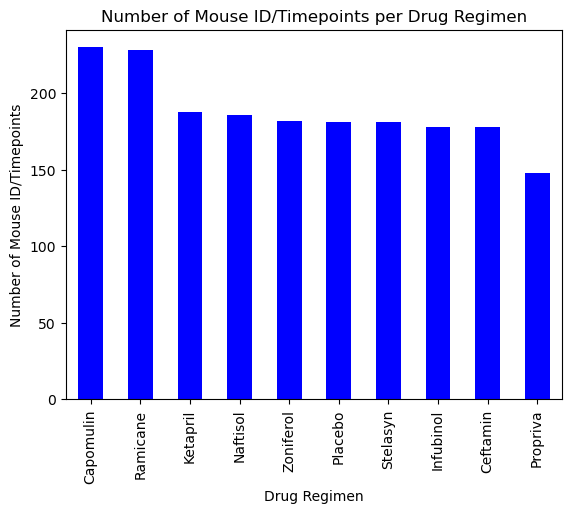

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_data_df['Drug Regimen'].value_counts()

drug_counts.plot.bar(color='blue')
plt.title('Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.show()

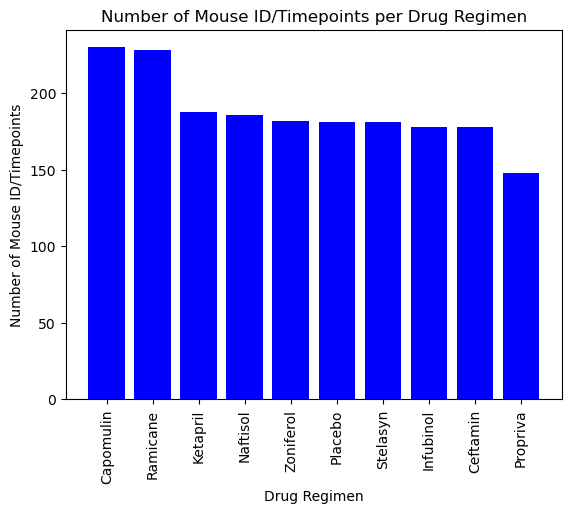

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_data_df['Drug Regimen'].value_counts()

plt.bar(drug_counts.index, drug_counts.values, color='blue')
plt.title('Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.xticks(rotation=90)
plt.show()

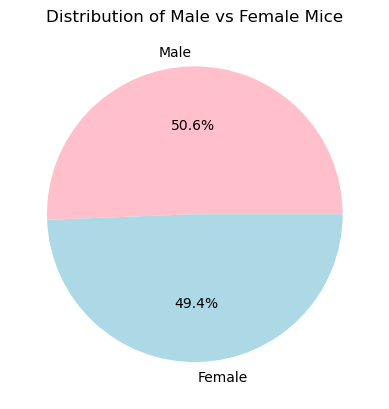

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = merged_data['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Distribution of Male vs Female Mice')
plt.ylabel('')
plt.show()


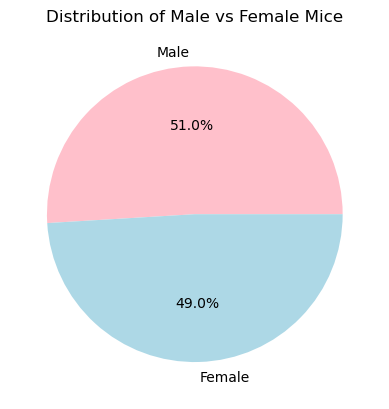

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data_df['Sex'].value_counts()

plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Distribution of Male vs Female Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, "Ramicane", Infubinol, and Ceftamin
four_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_data = clean_data_df[clean_data_df["Drug Regimen"].isin(four_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_data_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_df = pd.merge(clean_data_df, last_time, on=["Mouse ID", "Timepoint"])

# I"m filtering here to get the highest timepoint (last time)
tumor_vol_last = combined_df[combined_df["Timepoint"] == 45]


In [14]:
# I Created empty dictionary to store tumor volume data not sure if that is the only way? 
tumor_vol_data = {}

# Loop through each treatment and calculate the IQR and outliers
for treatment in four_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volume
    final_tumor_vol = tumor_vol_last.loc[tumor_vol_last['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Calc the IQR and quantitatively determine if there are any potential outliers.
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Find the outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # Store the data in the dict
    tumor_vol_data[treatment] = {"final_tumor_vol": final_tumor_vol, "lowerq": lowerq, "upperq": upperq,
                                  "iqr": iqr, "lower_bound": lower_bound,
                                  "upper_bound": upper_bound, "outliers": outliers}
    
# Now tumor_vol_data is a dict that has all the  data for each treatment
for treatment, data in tumor_vol_data.items():
    print(f"{treatment}:")
    print(f"Final Tumor Volume: {data['final_tumor_vol']}")
    print(f"Lower Quartile: {data['lowerq']}")
    print(f"Upper Quartile: {data['upperq']}")
    print(f"Interquartile Range: {data['iqr']}")
    print(f"Values below {data['lower_bound']} could be outliers.")
    print(f"Values above {data['upper_bound']} could be outliers.")
    print(f"Potential outliers: {data['outliers']}\n")


Capomulin:
Final Tumor Volume: 1     23.343598
2     28.484033
3     28.430964
10    31.023923
12    31.896238
13    32.377357
14    33.329098
16    34.455298
20    37.311846
22    36.041047
24    37.074024
28    38.846876
30    38.939633
31    38.982878
34    38.125164
36    40.658124
37    40.159220
38    40.728578
39    41.483008
40    41.581521
45    47.685963
Name: Tumor Volume (mm3), dtype: float64
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Interquartile Range: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane:
Final Tumor Volume: 0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.810366
23    37.225650
25    36.374510
27    37.311236
33    38.407618
41    40.659006
42    40.667713
43    45.220

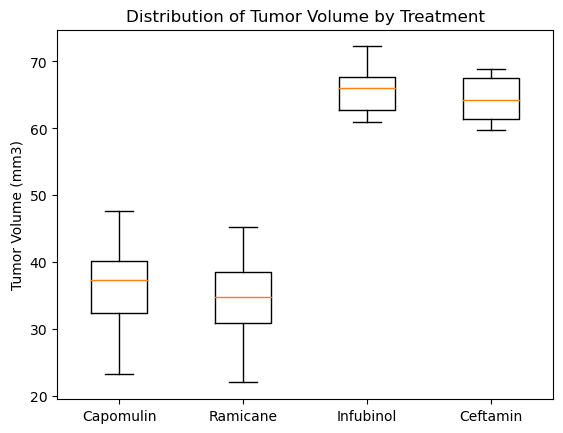

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_lists = [tumor_vol_data[treatment]["final_tumor_vol"] for treatment in four_regimens]
# Set up the box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_lists)

# Set the x-axis labels
ax.set_xticklabels(four_regimens)

# Add a title and y-axis label
ax.set_title("Distribution of Tumor Volume by Treatment")
ax.set_ylabel("Tumor Volume (mm3)")

# Show the box plot
plt.show()


# need red bubble mean or median??????


## Line and Scatter Plots

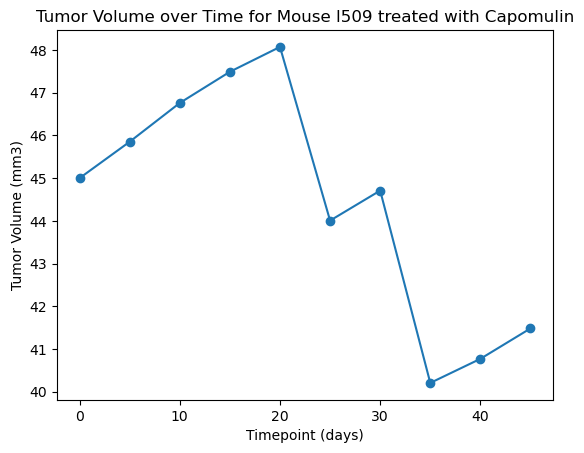

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a single mouse treated w/ drug"Capomulin"
mouse_id = "l509"
capomulin_data = regimen_data.loc[(regimen_data["Drug Regimen"] == "Capomulin") & (regimen_data["Mouse ID"] == mouse_id)]

# Create the line chart
fig, ax = plt.subplots()
ax.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker="o")

# Add labels & title to chart
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title(f"Tumor Volume over Time for Mouse {mouse_id} treated with Capomulin")

# showme
plt.show()



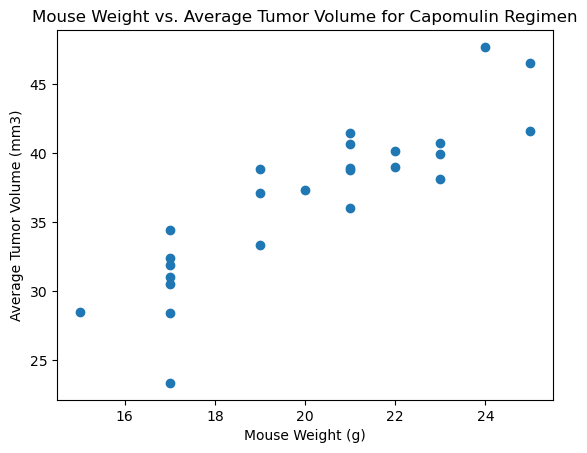

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin drug
capomulin_data = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume with the mouse weight
merged_data = pd.merge(capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates(), avg_tumor_vol, on="Mouse ID")

# build the scatter baby
fig, ax = plt.subplots()
ax.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

# Add labels/title
ax.set_xlabel("Mouse Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")
ax.set_title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Showme
plt.show()


## Correlation and Regression

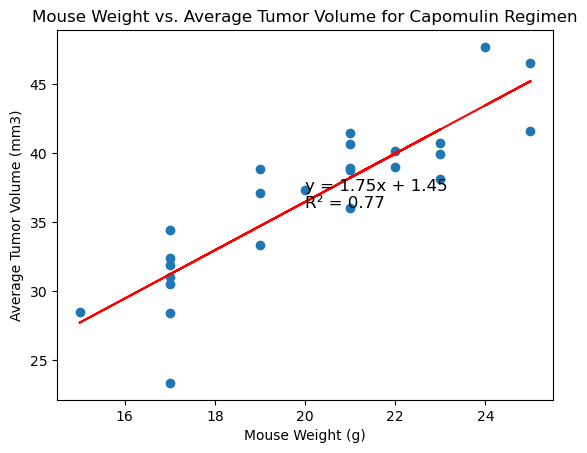

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter for drug Capomulin  
capomulin_data = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

# Calc the avg tumor vol for /mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the avg tumor vol w/ the mouse wgt
merged_data = pd.merge(capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates(), avg_tumor_vol, on="Mouse ID")

# Calc the correlation coefficient
corr_coef = merged_data["Weight (g)"].corr(merged_data["Tumor Volume (mm3)"])

# Create the scatter 
fig, ax = plt.subplots()
ax.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

# labels and title
ax.set_xlabel("Mouse Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")
ax.set_title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Add lR line to chart
x = merged_data["Weight (g)"].values.reshape(-1,1)
y = merged_data["Tumor Volume (mm3)"].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)
ax.plot(x, y_pred, color='red')

# Add.. not sure if this is right?? the equation and r-squared value to the chart
slope, intercept, r_value, p_value, std_err = linregress(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])
ax.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR\u00b2 = {r_value**2:.2f}", 
            xy=(20, 36), xycoords='data', fontsize=12)

# plot show
plt.show()



In [22]:
import seaborn as sns
corr_data = combined_df.corr()

<AxesSubplot:>

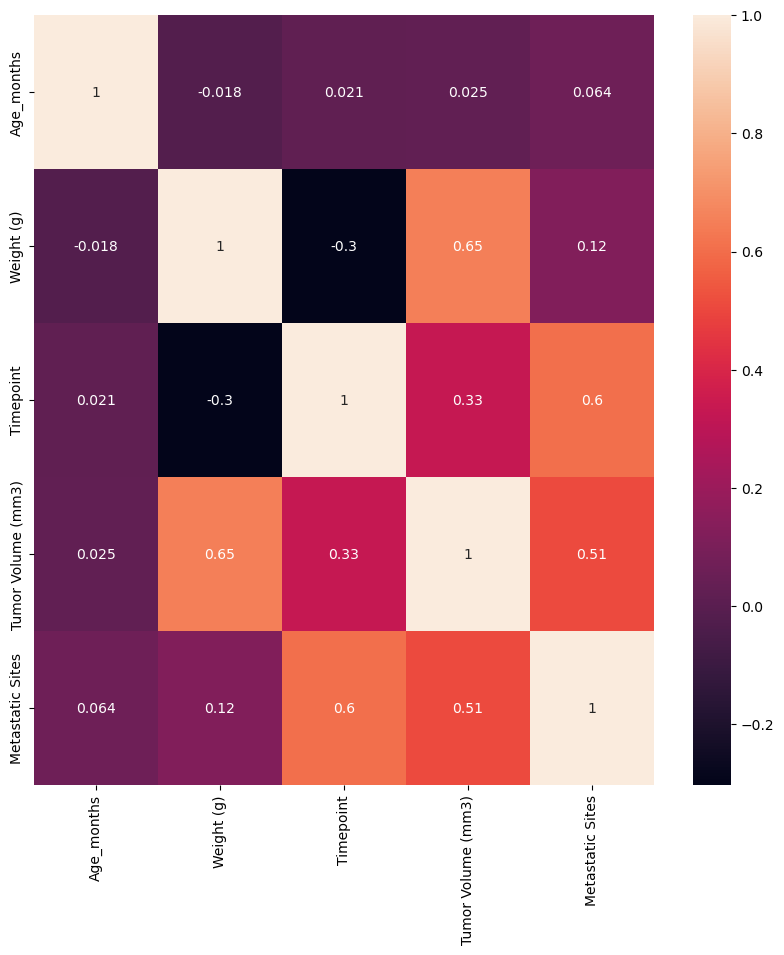

In [259]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_data , annot= True)